<a href="https://www.tensorflow.org/?hl=pt-br"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1280px-TensorFlowLogo.svg.png" width = 250, align = "center"></a>

<h1 align=center><font size = 8><strong> Regressão Linear</strong></font></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 5><strong>Nesse notebook iremos aprender a montar uma simples regressão linear</strong></font><br>
<br>
<p><a href="#ref2">Importanto módulos</a></p>
<p><a href="#ref3">Pre-processamento</a></p>
<p><a href="#ref4">Hiperparâmetros</a></p>
<p><a href="#ref5">Visualizando treino</a></p>
<p></p>
</div>
<br>

----------------

<a id="ref2"></a>
<h1>Importando módulos</h1>
<h2>Segue abaixo alguns módulos importantes que utilizaremos bastante:</h2>
<p><b>Numpy:</b> uma biblioteca bastante poderosa para computação ciêntifica em python<p/>
<p><b>Matplotlib:</b> uma biblioteca muito útil para viasualizar nossos dados</p>
<p><b>Tensorflow:</b> onde iremos realizar nosso grafo de execução para o modelo de regressão</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline  

<a id="ref3"></a>

<h1>Pre-processamento</h1>

In [2]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [3]:
print(train_X)
print()
print(train_Y)
print()
print("Shape X: {}\nShape Y: {}".format(np.shape(train_X),np.shape(train_Y)))
print()
print("Numero de instâncias:",n_samples)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ]

Shape X: (17,)
Shape Y: (17,)

Numero de instâncias: 17


# Parâmetros

In [4]:
learning_rate = 0.01
training_epochs = 10000
display_step = 1000

# Reset graph

In [5]:
tf.reset_default_graph()

# Graph input

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights

In [7]:
W = tf.Variable(np.random.randn(), name = "weight")
b = tf.Variable(np.random.randn(), name = "bias")

# Construct a linear model

In [8]:
pred = tf.add(tf.multiply(X,W),b)

# Mean Squared error

In [9]:
cost = tf.losses.mean_squared_error(Y,pred)

# Gradient descent

In [10]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)

In [11]:
init = tf.global_variables_initializer()

# Start training

Epoch: 1000 cost= 320.539123535 W= -2.2122562 b= -0.7978497
Epoch: 2000 cost= 303.798431396 W= -2.15742 b= -0.6824941
Epoch: 3000 cost= 287.526306152 W= -2.1025836 b= -0.567699
Epoch: 4000 cost= 271.772674561 W= -2.0479803 b= -0.4534814
Epoch: 5000 cost= 256.498748779 W= -1.9934574 b= -0.3398263
Epoch: 6000 cost= 241.818817139 W= -1.9395748 b= -0.22678679
Epoch: 7000 cost= 227.594146729 W= -1.8857067 b= -0.11437746
Epoch: 8000 cost= 213.861877441 W= -1.8320489 b= -0.0026321174
Epoch: 9000 cost= 200.605682373 W= -1.778541 b= 0.10841907
Epoch: 10000 cost= 187.813049316 W= -1.7251352 b= 0.21874778
Optimization Finished!
Training cost= 187.81305 W= -1.7251352 b= 0.21874778 



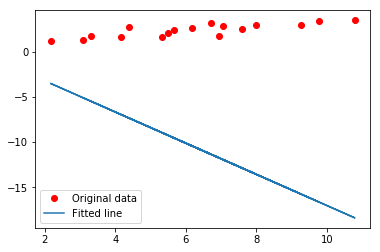

Testing... (Mean square loss Comparison)
Testing cost= 89.13429
Absolute mean square loss difference: 98.67876


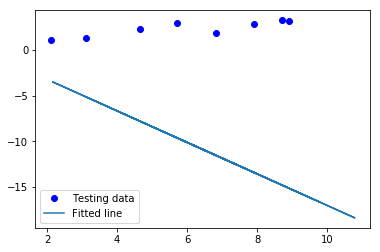

In [12]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()